In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
def my_softmax(z):
    ez = np.exp(z)
    return ez / np.sum(ez)

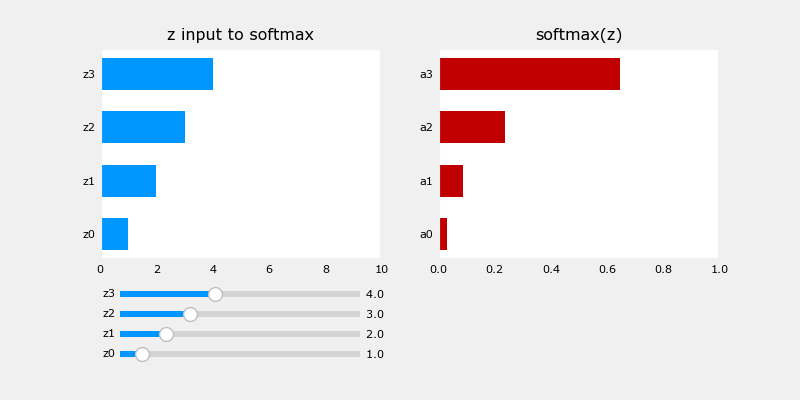

In [6]:
plt.close('all')
plt_softmax(my_softmax)

In [5]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

In [7]:
model = Sequential([
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(
    X_train, y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 0.9935
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4212
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1525
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0607
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0365


In [9]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred[:2])
print("largest value", {np.max(p_nonpreferred)}, "smallest value", {np.min(p_nonpreferred)})

63/63 [==============================] - 0s 997us/step
[[2.82e-03 2.54e-03 9.84e-01 1.02e-02]
 [9.97e-01 2.89e-03 3.42e-05 9.94e-06]]
largest value {0.99999964} smallest value {1.3158602e-09}


In [12]:
preferred_model = Sequential([
    Dense(25, activation="relu"),
    Dense(15, activation="relu"),
    Dense(4, activation='linear')
])
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(0.001)
)
preferred_model.fit(
    X_train, y_train, epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 1.2850
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6553
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3532
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1857
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0437


In [14]:
p_preferred = preferred_model.predict(X_train)
print(f"前两个：{p_preferred[:2]}")
print(f"最大：{np.max(p_preferred)},最小：{np.min(p_preferred)}")

63/63 [==============================] - 0s 1ms/step
前两个：[[-2.57 -1.98  3.08 -1.26]
 [ 6.44  1.62 -3.06 -6.2 ]]
最大：11.824856758117676,最小：-14.623801231384277


In [0]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"前两个：{sm_preferred[:2]}")
print(f"最大：{np.max(sm_preferred)},最小：{np.min(sm_preferred)}")

In [20]:
print(f"p_preferred,shape={p_preferred.shape}")

p_preferred,shape=(2000, 4)


In [21]:
for i in range(5):
    print(f"{p_preferred[i]},category:{np.argmax(p_preferred[i])}")

[-2.57 -1.98  3.08 -1.26],category:2
[ 6.44  1.62 -3.06 -6.2 ],category:0
[ 4.74  1.59 -2.42 -4.86],category:0
[-0.69  3.68 -0.98 -3.28],category:1
[ 0.19 -2.26  5.84 -8.6 ],category:2


In [22]:
for z in [500, 600, 700, 800]:
    ez = np.exp(z)
    zs = "{" + f"{z}" + "}"
    print(f"e^{zs}={ez:0.2e}")


e^{500}=1.40e+217
e^{600}=3.77e+260
e^{700}=1.01e+304
e^{800}=inf


C:\ProgramData\anaconda3\envs\wed\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [24]:
z_tmp = np.array([[500, 600, 700, 800]])
my_softmax(z_tmp)

C:\ProgramData\anaconda3\envs\wed\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.,  0.,  0., nan]])

In [25]:
def my_softmax_ns(z):
    bigz = np.max(z)
    ez = np.exp(z - bigz)
    sm = ez / np.sum(ez)
    return sm

In [26]:
z_tmp=np.array([500.,600,700,800])
print(tf.nn.softmax(z_tmp).numpy(),"\n",my_softmax_ns(z_tmp))

[5.15e-131 1.38e-087 3.72e-044 1.00e+000] 
 [5.15e-131 1.38e-087 3.72e-044 1.00e+000]
